### **Ridge Regression and LASSO**

 Implement the Ridge regression (both the closed-form solution and SGD) and is compared with linear regression in terms of convergence rate and/or classification accuracy in the binary classification task of digits ('7' and '9') in the MNIST dataset(https://www.kaggle.com/datasets/oddrationale/mnist-in-csv).


Train set: (12214, 784)
Test set: (2037, 784)

Results:

Linear Regression (GD):     Train=0.957, Test=0.958
Ridge Regression (GD):      Train=0.956, Test=0.960
Ridge Regression (Closed):  Train=0.962, Test=0.960

Convergence:



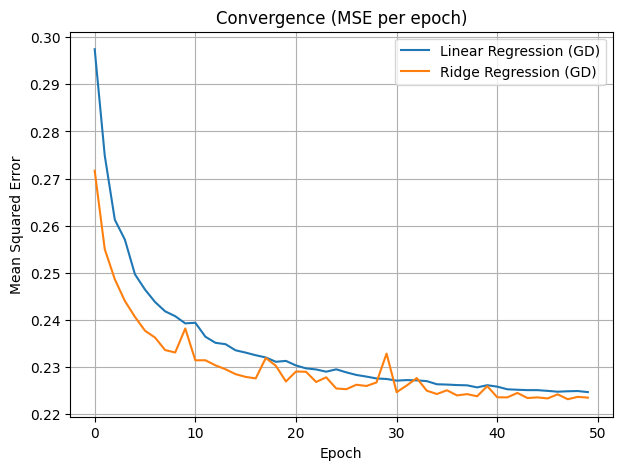

In [11]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST using Hugging Face
trainset = load_dataset('mnist', split='train')
testset = load_dataset('mnist', split='test')

# Convert images to numpy arrays and flatten
X_train = np.array([np.array(img['image']).flatten() for img in trainset], dtype=np.float32) / 255.0
y_train = np.array([img['label'] for img in trainset], dtype=np.int32)

X_test = np.array([np.array(img['image']).flatten() for img in testset], dtype=np.float32) / 255.0
y_test = np.array([img['label'] for img in testset], dtype=np.int32)

# Filter digits 7 and 9
def filter_digits(X, y, digits=(7, 9)):
    mask = np.isin(y, digits)
    X = X[mask]
    y = y[mask]
    y = np.where(y == digits[1], 1, -1)  # +1 for 9, -1 for 7
    return X, y

X_train, y_train = filter_digits(X_train, y_train)
X_test, y_test = filter_digits(X_test, y_test)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

class Optimizer():
  def __init__(self, lr, annealing_rate, batch_size, max_epochs):
    self.lr = lr
    self.annealing_rate = annealing_rate
    self.batch_size = batch_size
    self.max_epochs = max_epochs

def linear_regression_gd(X, y, op):
  n = X.shape[0]
  w = np.zeros(X.shape[1])
  lr = op.lr
  errors = np.zeros(op.max_epochs)

  for epoch in range(op.max_epochs):
    indices = np.random.permutation(n)
    for batch_start in range(0, n, op.batch_size):
      X_batch = X[indices[batch_start:batch_start + op.batch_size]]
      y_batch = y[indices[batch_start:batch_start + op.batch_size]]

      # vectorization to compute gradients for each mini batch (XᵀXw - Xᵀy)
      w_grad = X_batch.T @ X_batch @ w - X_batch.T @ y_batch
      w -= lr * w_grad / X_batch.shape[0]

    diff = X @ w - y
    errors[epoch] = np.sum(diff * diff) / n
    lr *= op.annealing_rate

  return w, errors

# Ridge Regression Closed Form
def ridge_regression_closed(X, y, lam):
    n, d = X.shape
    I = np.eye(d)
    return np.linalg.inv(X.T @ X + lam * I) @ (X.T @ y)

# Ridge Regression Gradient Descent
def ridge_regression_gd(X, y, op, lam):
  n = X.shape[0]
  w = np.zeros(X.shape[1])
  lr = op.lr
  errors = np.zeros(op.max_epochs)

  for epoch in range(op.max_epochs):
    indices = np.random.permutation(n)
    for batch_start in range(0, n, op.batch_size):
      X_batch = X[indices[batch_start:batch_start + op.batch_size]]
      y_batch = y[indices[batch_start:batch_start + op.batch_size]]


      # Gradient: (2 * Xᵀ(Xw - y))/batch_size + 2λw
      w_grad = (2 * X_batch.T @ (X_batch @ w - y_batch)) + 2*lam * w
      w -= lr * w_grad / X_batch.shape[0]

    diff = X @ w - y
    errors[epoch] = np.sum(diff * diff) / n
    lr *= op.annealing_rate

  return w, errors

# Accuracy helper function
def accuracy(X, y, w):
    preds = np.sign(X @ w)
    return np.mean(preds == y)

# setting optimizer values, and lambda value
op = Optimizer(lr=0.01, annealing_rate=0.99, batch_size=128, max_epochs=50)
lam = 1.0

# Linear Regression (GD)
w_linear, errors_linear = linear_regression_gd(X_train, y_train, op)
acc_linear_train = accuracy(X_train, y_train, w_linear)
acc_linear_test = accuracy(X_test, y_test, w_linear)

# Ridge Regression (GD)
w_ridge_gd, errors_ridge_gd = ridge_regression_gd(X_train, y_train, op, lam)
acc_ridge_gd_train = accuracy(X_train, y_train, w_ridge_gd)
acc_ridge_gd_test = accuracy(X_test, y_test, w_ridge_gd)

# Ridge Regression (Closed-form)
w_ridge_closed = ridge_regression_closed(X_train, y_train, lam)
acc_ridge_closed_train = accuracy(X_train, y_train, w_ridge_closed)
acc_ridge_closed_test = accuracy(X_test, y_test, w_ridge_closed)

print("\nResults:\n")
print(f"Linear Regression (GD):     Train={acc_linear_train:.3f}, Test={acc_linear_test:.3f}")
print(f"Ridge Regression (GD):      Train={acc_ridge_gd_train:.3f}, Test={acc_ridge_gd_test:.3f}")
print(f"Ridge Regression (Closed):  Train={acc_ridge_closed_train:.3f}, Test={acc_ridge_closed_test:.3f}")


print("\nConvergence:\n")
plt.figure(figsize=(7,5))
plt.plot(errors_linear, label="Linear Regression (GD)")
plt.plot(errors_ridge_gd, label="Ridge Regression (GD)")
plt.title("Convergence (MSE per epoch)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

**Part 4.2** (10 marks) Implement the SGD for LASSO and compare its solution with that of [the linear regression method](https://colab.research.google.com/drive/1qMWyoqylJpDEbMwtcSGLZJzhJsOyWW8r) in the Boston House data set. Discuss your findings.



Processing file 1IZf0tFGW3Zv3Ax5gxKgnklHe1DUI7CAI boston.csv
Data shape: (506, 13)
Target shape: (506,)

Mean Squared Errors

Linear Regression (GD): 530.05423
LASSO (SGD):            536.18161


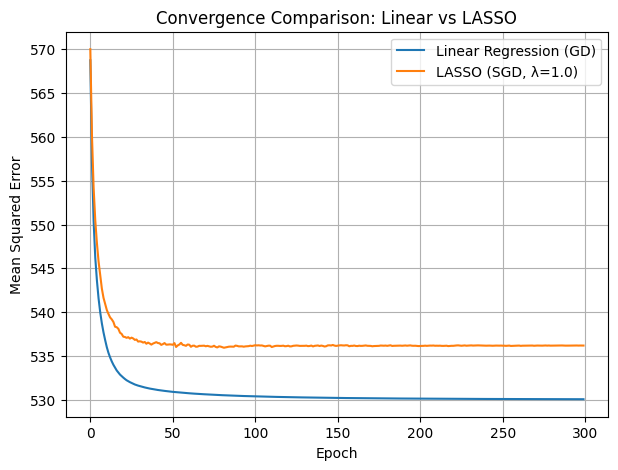

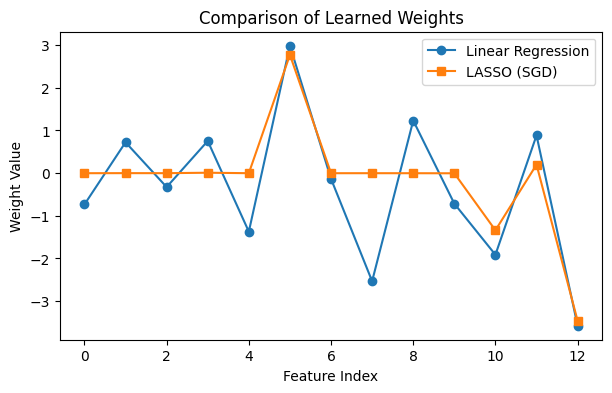

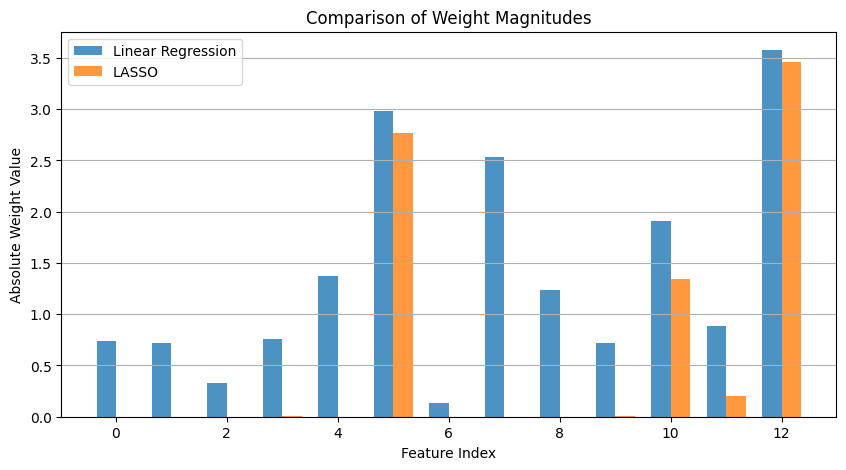

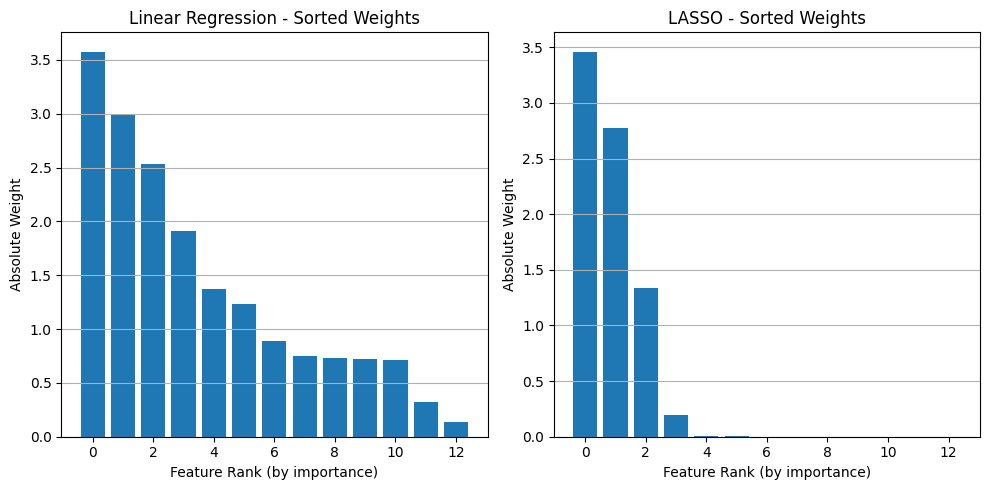

In [12]:
!gdown --folder https://drive.google.com/drive/folders/12L9XNwhIH2wQBa4-IdQrhsrtgRFbeIMZ 2> /dev/null

import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

raw_data = pd.read_csv('Boston/boston.csv', header=None)
data_rows = np.reshape(raw_data.to_numpy(), (506,14))
data = data_rows[:, :13]
target = data_rows[:, 13]

# Normalize input features to zero-mean and unit-variance
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

print("Data shape:", data.shape)
print("Target shape:", target.shape)

class Optimizer():
    def __init__(self, lr, annealing_rate, batch_size, max_epochs):
        self.lr = lr
        self.annealing_rate = annealing_rate
        self.batch_size = batch_size
        self.max_epochs = max_epochs

def linear_regression_gd(X, y, op):
    n = X.shape[0]
    w = np.zeros(X.shape[1])
    lr = op.lr
    errors = np.zeros(op.max_epochs)

    for epoch in range(op.max_epochs):
        indices = np.random.permutation(n)
        for batch_start in range(0, n, op.batch_size):
            X_batch = X[indices[batch_start:batch_start + op.batch_size]]
            y_batch = y[indices[batch_start:batch_start + op.batch_size]]

            # vectorization to compute gradients for each mini batch (XᵀXw - Xᵀy)
            w_grad = X_batch.T @ (X_batch @ w - y_batch)
            w -= lr * w_grad / X_batch.shape[0]

        diff = X @ w - y
        errors[epoch] = np.mean(diff**2)
        lr *= op.annealing_rate

    return w, errors

def lasso_sgd(X, y, op, lam=0.1):
    n, d = X.shape
    w = np.zeros(d)
    lr = op.lr
    errors = np.zeros(op.max_epochs)

    for epoch in range(op.max_epochs):
        indices = np.random.permutation(n)
        for batch_start in range(0, n, op.batch_size):
            X_batch = X[indices[batch_start:batch_start + op.batch_size]]
            y_batch = y[indices[batch_start:batch_start + op.batch_size]]

            w_grad = X_batch.T @ (X_batch @ w - y_batch) / X_batch.shape[0] + lam * np.sign(w)

            # Gradient descent step
            w -= lr * w_grad

        diff = X @ w - y
        errors[epoch] = np.mean(diff**2)
        lr *= op.annealing_rate

    return w, errors


#op = Optimizer(lr=0.000001, annealing_rate=0.99, batch_size=32, max_epochs=200)
#lam = 0.0002

#op = Optimizer(lr=0.001, annealing_rate=0.99, batch_size=2, max_epochs=100)
#lam = 0.1

op = Optimizer(
    lr=0.01,
    annealing_rate=0.99,
    batch_size=64,
    max_epochs=300
)
lam = 1.0

w_linear, errors_linear = linear_regression_gd(data, target, op)
w_lasso, errors_lasso = lasso_sgd(data, target, op, lam)

print("\nMean Squared Errors\n")
print(f"Linear Regression (GD): {np.mean((data @ w_linear - target)**2):.5f}")
print(f"LASSO (SGD):            {np.mean((data @ w_lasso - target)**2):.5f}")

#convergence comparison
plt.figure(figsize=(7,5))
plt.plot(errors_linear, label="Linear Regression (GD)")
plt.plot(errors_lasso, label=f"LASSO (SGD, λ={lam})")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Convergence Comparison: Linear vs LASSO")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(7,4))
plt.plot(w_linear, 'o-', label='Linear Regression')
plt.plot(w_lasso, 's-', label='LASSO (SGD)')
plt.xlabel("Feature Index")
plt.ylabel("Weight Value")
plt.title("Comparison of Learned Weights")
plt.legend()
plt.show()


# bar chart: weight magnitudes
plt.figure(figsize=(10, 5))
x = np.arange(len(w_linear))
width = 0.35

plt.bar(x - width/2, np.abs(w_linear), width, label='Linear Regression', alpha=0.8)
plt.bar(x + width/2, np.abs(w_lasso), width, label='LASSO', alpha=0.8)
plt.xlabel("Feature Index")
plt.ylabel("Absolute Weight Value")
plt.title("Comparison of Weight Magnitudes")
plt.legend()
plt.grid(True, axis='y')
plt.show()

# sorted comparison of weights
plt.figure(figsize=(10, 5))
sorted_idx_linear = np.argsort(np.abs(w_linear))[::-1]
sorted_idx_lasso = np.argsort(np.abs(w_lasso))[::-1]

plt.subplot(1, 2, 1)
plt.bar(range(13), np.abs(w_linear)[sorted_idx_linear])
plt.xlabel("Feature Rank (by importance)")
plt.ylabel("Absolute Weight")
plt.title("Linear Regression - Sorted Weights")
plt.grid(True, axis='y')

plt.subplot(1, 2, 2)
plt.bar(range(13), np.abs(w_lasso)[sorted_idx_lasso])
plt.xlabel("Feature Rank (by importance)")
plt.ylabel("Absolute Weight")
plt.title("LASSO - Sorted Weights")
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

** Discussion of Findings**

Initially, I tried several different hyperperameters to try and find the optimum results using the mean squared error (MSE) as a metric. The outcome was that when γ = 0.1, they both had a fairly similar MSE (approximately 530). The two models' convergence also appeared to be fairly similar.

The two functions near equal output at small values of λ are clear when we compare their objective functions:

$$
w_{\text{lasso}}^{*} = \arg\min_{w} \left[ \frac{1}{2} \sum_{i=1}^{N} \left( w^{\top} x_{i} - y_{i} \right)^{2} + \lambda \lVert w \rVert_{1} \right]$$


$$E(\mathbf{w}) = \frac{1}{2} \sum_{i=1}^{N} \big( \mathbf{w}^{\intercal} \mathbf{x}_{i} - y_{i} \big)^{2}$$

As we can see, having a small value of λ means that the only difference between the two is that LASSO adds attenuates its prediction very slightly as L1 w has a small coefficient.

This changes radically when we increase the size of λ resulting in the essential tradeoff which is produced by LASSO: a higher MSE but overall more sparsity in model weights. This can be seen in the above "matplot" charts which highlights the feature selection which is achieved by LASSO. Compared to linear regression, it was able to effectively shrink the total amount of important features from 12 to 4. By increasing the λ further to 2.0, I observed that it decreased even further to 3 features.

This tradeoff can be very useful and desirables in applications where data collection may be costly, and/or the number of features in a data set are very high. By reducing the number of features to a subset of essential, we can reduce costs while still achieving useful model that is intuitive to interpet. This is a contrast from other approaches such as PCA. Although it too reduces the number of features, the original principal components are now modeled as a *composite* of features rather than a subset. In this way, the task of analyzing and interpreting the results of PCA is more abstract than LASSO.